In [1]:
! pip install xgboost

     |████████████████████████████████| 173.5 MB 96 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
#from ipynb.fs.Feature_Engineering import factorial


In [3]:
model = XGBClassifier() 
model.load_model("XGBOOST.model")

In [4]:
df = pd.read_csv("application_test.csv")

On doit normaliser la donnees avant la prediction


Supprimer les colonnes de data prep + les 3 autres de featuring

Normaliser la donnees (ya une fonction pour dans le featuring notebook)

In [5]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(48744, 121)

We delete the same columns as "application_train"

In [7]:
df.drop(['OWN_CAR_AGE','OCCUPATION_TYPE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE', 'EXT_SOURCE_3','FLAG_MOBIL','FLAG_DOCUMENT_2','SK_ID_CURR'], axis = 1, inplace = True)

In [8]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

NAME_CONTRACT_TYPE: 0.0%
CODE_GENDER: 0.0%
FLAG_OWN_CAR: 0.0%
FLAG_OWN_REALTY: 0.0%
CNT_CHILDREN: 0.0%
AMT_INCOME_TOTAL: 0.0%
AMT_CREDIT: 0.0%
AMT_ANNUITY: 0.05%
AMT_GOODS_PRICE: 0.0%
NAME_TYPE_SUITE: 1.87%
NAME_INCOME_TYPE: 0.0%
NAME_EDUCATION_TYPE: 0.0%
NAME_FAMILY_STATUS: 0.0%
NAME_HOUSING_TYPE: 0.0%
REGION_POPULATION_RELATIVE: 0.0%
DAYS_BIRTH: 0.0%
DAYS_EMPLOYED: 0.0%
DAYS_REGISTRATION: 0.0%
DAYS_ID_PUBLISH: 0.0%
FLAG_EMP_PHONE: 0.0%
FLAG_WORK_PHONE: 0.0%
FLAG_CONT_MOBILE: 0.0%
FLAG_PHONE: 0.0%
FLAG_EMAIL: 0.0%
CNT_FAM_MEMBERS: 0.0%
REGION_RATING_CLIENT: 0.0%
REGION_RATING_CLIENT_W_CITY: 0.0%
WEEKDAY_APPR_PROCESS_START: 0.0%
HOUR_APPR_PROCESS_START: 0.0%
REG_REGION_NOT_LIVE_REGION: 0.0%
REG_REGION_NOT_WORK_REGION: 0.0%
LIVE_REGION_NOT_WORK_REGION: 0.0%
REG_CITY_NOT_LIVE_CITY: 0.0%
REG_CITY_NOT_WORK_CITY: 0.0%
LIVE_CITY_NOT_WORK_CITY: 0.0%
ORGANIZATION_TYPE: 0.0%
EXT_SOURCE_2: 0.02%
OBS_30_CNT_SOCIAL_CIRCLE: 0.06%
DEF_30_CNT_SOCIAL_CIRCLE: 0.06%
OBS_60_CNT_SOCIAL_CIRCLE: 0.06%
DEF_6

In [10]:
df.shape

(48744, 67)

We remove missing Rows

In [11]:
df =df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], how='all')
df.shape

(42695, 67)

In [12]:
df =df.dropna(subset=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], how='all')
df.shape

(42671, 67)

In [13]:
df.dropna(how="any").shape

(41821, 67)

In [14]:
df =df.dropna(how="any")
df.shape

(41821, 67)

In [15]:
print(" \nCount total NaN in a DataFrame : \n\n",df.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 0


In [16]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


We normalize the dataframe

In [17]:
def encoding (df:pd.DataFrame):
    encoder = preprocessing.LabelEncoder()
    df = df.apply(encoder.fit_transform)
    return df

In [18]:
df_non_numerical = df.select_dtypes(object)
df_numerical = df.select_dtypes(include=np.number)

df_non_numerical = encoding(df_non_numerical)
df = pd.concat([df_numerical, df_non_numerical], axis=1)

In [19]:
def normalise (df :pd.DataFrame):
    normalizer = preprocessing.MinMaxScaler()
    df = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns, index=df.index)
    return df

df = normalise(df)

df.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.0,0.024641,0.247660,0.102453,0.191489,0.257380,0.331893,0.039545,0.782059,0.872086,...,0.0,0.0,1.0,1.0,1.0,0.25,0.25,0.2,0.833333,0.491228
1,0.0,0.016427,0.084051,0.084558,0.063830,0.491855,0.397957,0.033953,0.615631,0.744329,...,1.0,0.0,1.0,1.0,1.0,1.00,0.25,0.2,0.000000,0.736842
3,0.1,0.065708,0.723404,0.262078,0.723404,0.361760,0.627414,0.040755,0.915690,0.337114,...,0.0,0.0,1.0,1.0,1.0,1.00,0.25,0.2,1.000000,0.087719
5,0.0,0.055441,0.432477,0.181206,0.361702,0.344765,0.367647,0.014251,0.742180,0.680687,...,0.0,1.0,1.0,1.0,0.6,1.00,0.25,0.2,0.166667,0.192982
6,0.1,0.034908,0.214762,0.111187,0.155319,0.312048,0.475359,0.038889,0.573181,0.962035,...,1.0,1.0,1.0,1.0,1.0,0.25,0.25,0.2,0.666667,0.456140


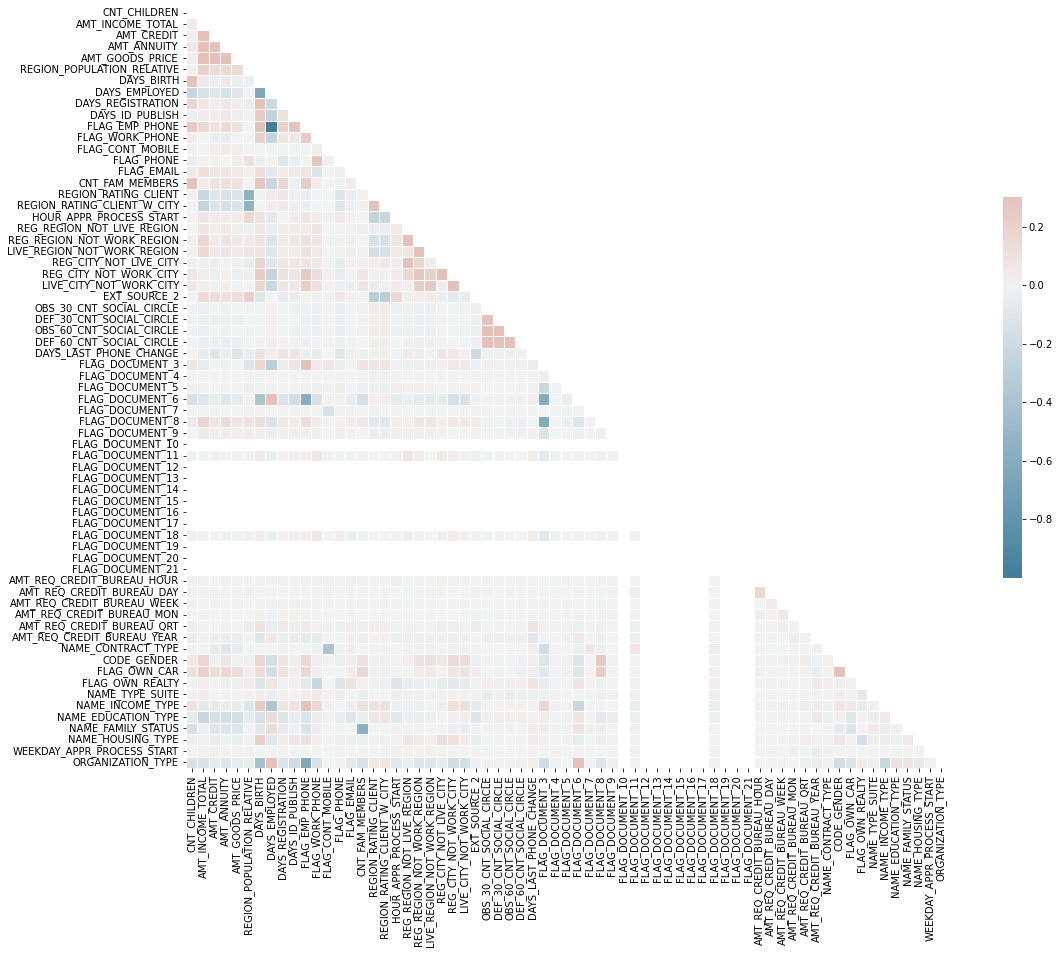

In [20]:
def corr_matrix (df:pd.DataFrame):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(20, 14))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_matrix(df)

In [21]:
prediction = model.predict(df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e2ef48b-7703-4677-a8b9-64913d9e5bbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>